<a href="https://colab.research.google.com/github/Kayyat/qualidade-da-agua/blob/main/Estudo_da_Qualidade_da_%C3%81gua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Problema de Negócio:

O acesso a água potável é primordial para a saúde além de ser um direito humano básico. Em alguns locais, percebeu-se que os investimentos em abastecimentos de água e no saneamento podem gerar um benefício econômico já que as reduções nos efeitos negativos à saúde são maiores do que o custo de internações por conta da mesma. Com base em dados coletados, precisamos prever a qualidade, ou potabilidade da água a fim de evitar efeitos danosos a saúde e consequentemente trazer esse benefício econômico.



* Dados do Negócio:

https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [2]:
#Importando bibliotecas que serão utilizadas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Algoritimos e Métricas:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


*Análise Exploratória:

- ph: Valor de pH
- Hardness: Dureza
- Solids: Total de Sólidos Dissolvidos
- Chloramines: Cloraminas
- Sulfate: Sulfato
- Conductivity: Condutividade
- Organic_carbon: Carbono Orgânico
- Trihalomethanes: Trialometanos
- Turbidity: Turbidez
- Potability: Potabilidade



In [4]:
#Checando valores nulos:

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# Comparar os faltantes com o tamanho do data para verificar a gravidade dos valores faltantes:

df.shape

(3276, 10)

In [6]:
# Verificando se todas as medidas estão com o mesmo tipo:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


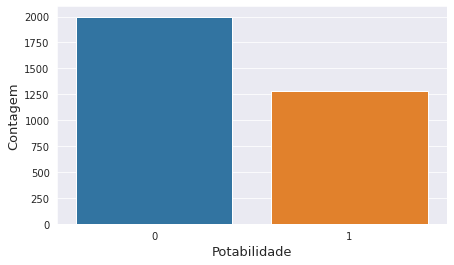

In [8]:
# Criando um gráfico para ver se há problema de desbalanceamento de classe.

potabilidade_lbl = df.Potability.value_counts()

plt.figure(figsize=(7,4))
sns.barplot(potabilidade_lbl.index, potabilidade_lbl);
plt.xlabel('Potabilidade', fontsize = 13)
plt.ylabel('Contagem', fontsize = 13);

Text(0.5, 1.0, 'Correlação Matrix')

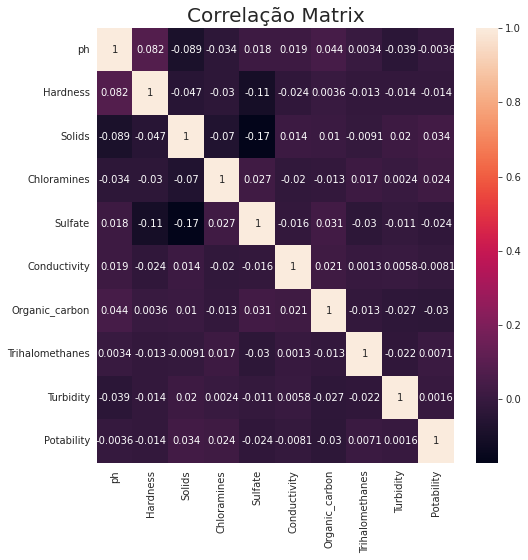

In [9]:
#Mapa de Correlação: Como os niveis de Sulfato/Sólido estão muito fora, verificar a necessidade do uso dos dados deles para a máquina !

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlação Matrix', fontsize = 20)

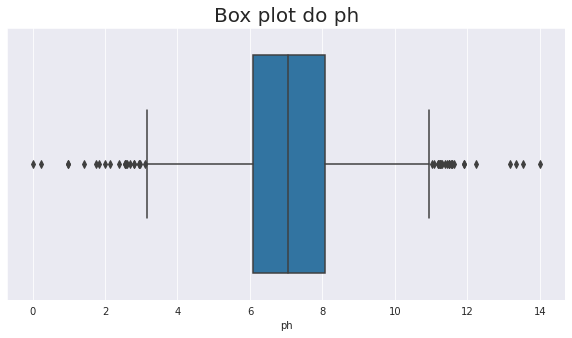

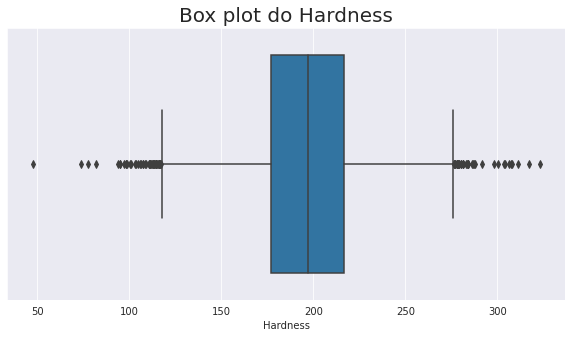

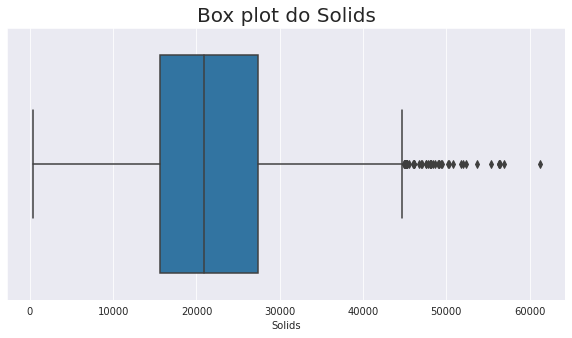

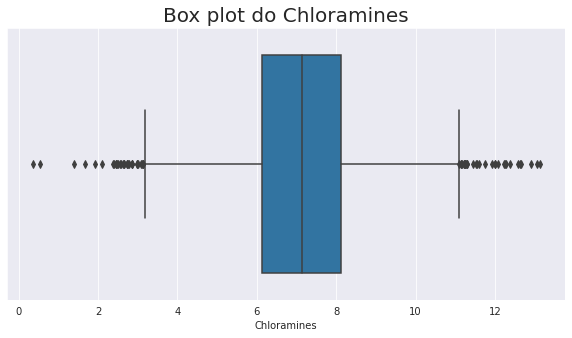

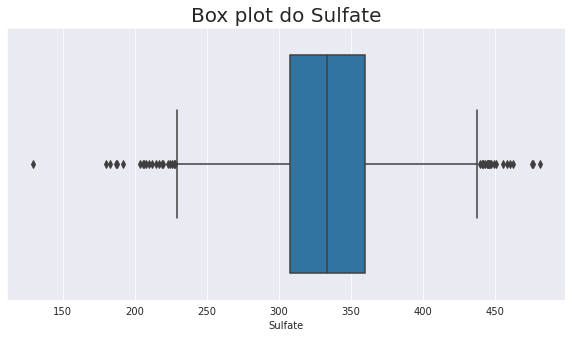

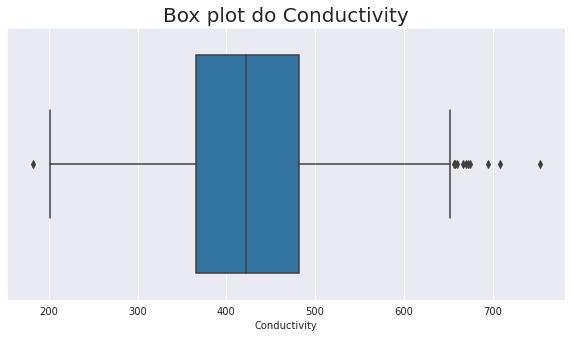

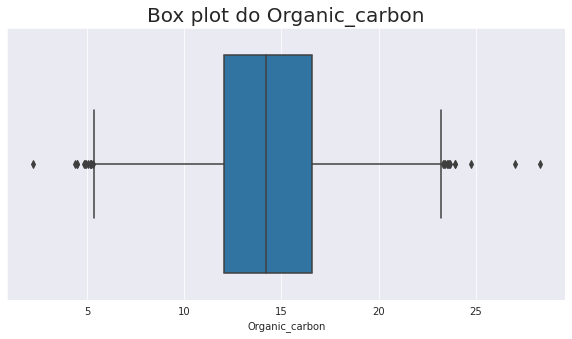

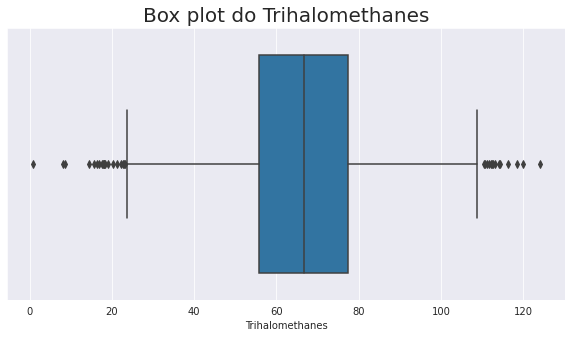

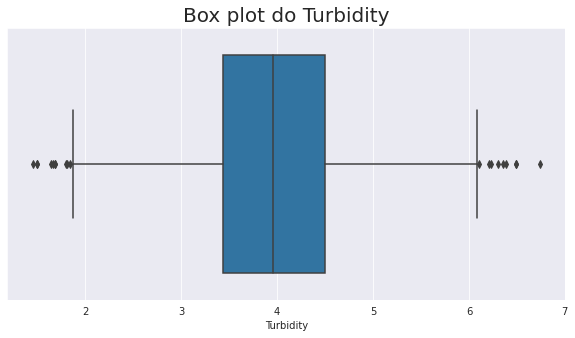

In [10]:
# Verificando a distribuição das variáveis:

for column in df.columns[:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[column])
    plt.title('Box plot do {}' .format(column), fontsize=20);

* Processamento de Dados

In [11]:
#Substituindo valores nulos pela média:

ph_media = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_media

ph_media2 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_media2

sulfato_media = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulfato_media

sulfato_media2 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulfato_media2

traih_media = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_media

traih_media2 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_media2

In [12]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
#Separando variáveis e target:

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
# Teste e Treino:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [18]:
#Verificando o tamanho das variaveis de treino e teste

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape (2293, 9)
x_test shape (983, 9)


In [19]:
#Padronizando:

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
#Criando uma lista para os resultados da acurácia dos modelos, Aplicando e Avaliando o Machine Learning:

modelos_acc = []

modelos = [LogisticRegression(), RandomForestClassifier(), GaussianNB(), SVC(), KNeighborsClassifier()]

for modelo in modelos:
    modelo.fit(x_train, y_train)

    predicao = modelo.predict(x_test)

    modelos_acc.append(accuracy_score(y_test, predicao))

In [31]:
resultado = pd.DataFrame({
      'Acurácia': modelos_acc,
      'Nome da Máquina': ['LogisticRegression', 'RandomForestClassifier', 'GaussianNB', 'SVC', 'KNeighborsClassifier']
})

In [32]:
resultado

,Acurácia,Nome da Máquina
0,0.624619,LogisticRegression
1,0.808749,RandomForestClassifier
2,0.611394,GaussianNB
3,0.682604,SVC
4,0.635809,KNeighborsClassifier


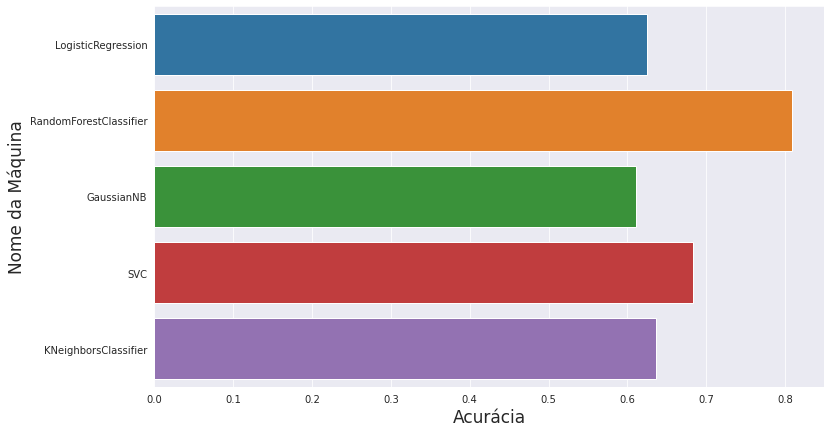

In [35]:
#Plotando o resultado dos modelos:

plt.figure(figsize=(12,7))
sns.barplot(resultado['Acurácia'], resultado['Nome da Máquina'])
plt.xlabel('Acurácia', fontsize = 17)
plt.ylabel('Nome da Máquina', fontsize = 17);
